In [2]:
#import all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [79]:
#Reading the test dataset

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [81]:
df.shape

(5681, 11)

Data set contains 5681 rows and 11 columns .

In [82]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [83]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

In [84]:
df.loc[df['Outlet_Type']==" "]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [85]:
df["Outlet_Type"]=df["Outlet_Type"].replace(" ",np.nan)

In [86]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<AxesSubplot:>

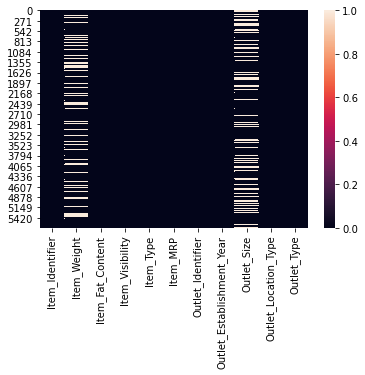

In [14]:
sns.heatmap(df.isnull())

Item weight and outlet size has null values , so we can replace them with mean and mode value repesctively.

## Filling the Null Values

In [15]:
df['Item_Weight']=df['Item_Weight'].fillna((df['Item_Weight'].mean()))

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Outlet_Size"]=le.fit_transform(df["Outlet_Size"])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,1,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,3,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,3,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,3,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,1,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,2,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,1,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,3,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,3,Tier 2,Supermarket Type1


In [17]:
df['Outlet_Size']=df['Outlet_Size'].fillna((df['Outlet_Size'].mode()))
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,1,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,3,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,3,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,3,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,1,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,2,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,1,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,3,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,3,Tier 2,Supermarket Type1


In [18]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Data Visulization

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

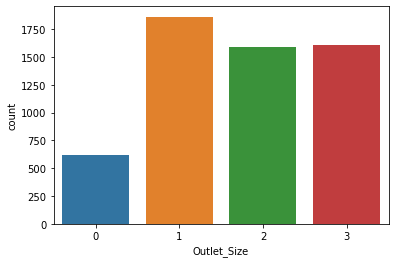

In [19]:
sns.countplot(df["Outlet_Size"],data=df)

category 1 outlet size are more.

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

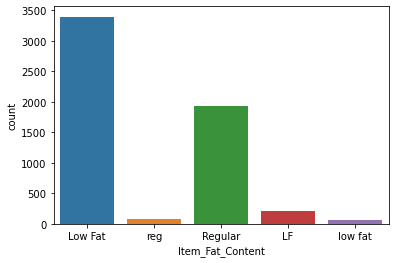

In [20]:
sns.countplot(df["Item_Fat_Content"],data=df)

In [21]:
df_visualization_nominal=df[["Item_Identifier","Item_Weight","Item_Fat_Content","Item_Type","Item_MRP","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type"]].copy()

In [22]:
df_visualization_nominal.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

FDQ60    8
FDN52    8
DRF48    8
FDW10    8
NCS41    8
        ..
NCI54    1
DRD12    1
FDH50    1
DRP35    1
FDW26    1
Name: Item_Identifier, Length: 1543, dtype: int64


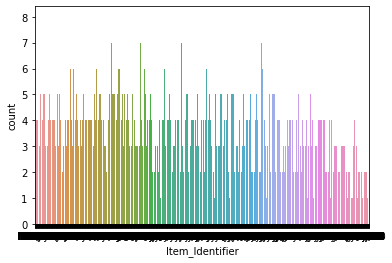

In [23]:
ax = sns.countplot(x="Item_Identifier",data=df_visualization_nominal)
print(df_visualization_nominal["Item_Identifier"].value_counts())

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64


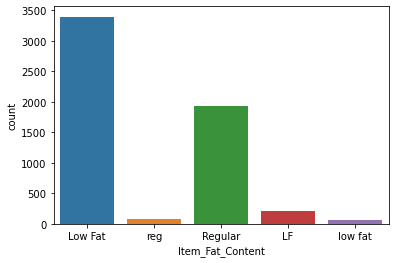

In [24]:
ax = sns.countplot(x="Item_Fat_Content",data=df_visualization_nominal)
print(df_visualization_nominal["Item_Fat_Content"].value_counts())

Here countplot contains the data visualization of nominal columns of item_fat_content contains low fat 3396 and regular 1935

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64


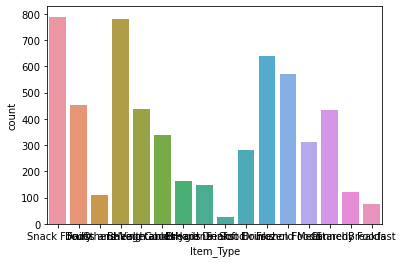

In [25]:
ax = sns.countplot(x="Item_Type",data=df_visualization_nominal)
print(df_visualization_nominal["Item_Type"].value_counts())

57.0614     5
194.9452    4
150.8050    4
61.3194     4
179.6660    4
           ..
42.7086     1
257.2672    1
161.4552    1
194.2452    1
185.3582    1
Name: Item_MRP, Length: 4402, dtype: int64


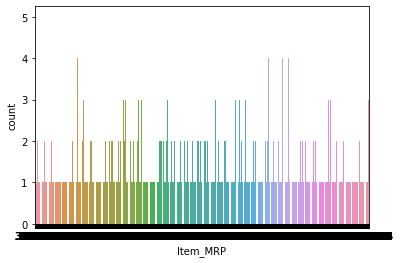

In [26]:
ax = sns.countplot(x="Item_MRP",data=df_visualization_nominal)
print(df_visualization_nominal["Item_MRP"].value_counts())

OUT027    624
OUT013    621
OUT046    620
OUT049    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64


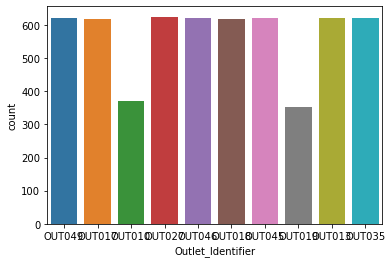

In [27]:
ax = sns.countplot(x="Outlet_Identifier",data=df_visualization_nominal)
print(df_visualization_nominal["Outlet_Identifier"].value_counts())

1985    976
1987    621
2004    620
1997    620
1999    620
2002    619
2009    618
2007    617
1998    370
Name: Outlet_Establishment_Year, dtype: int64


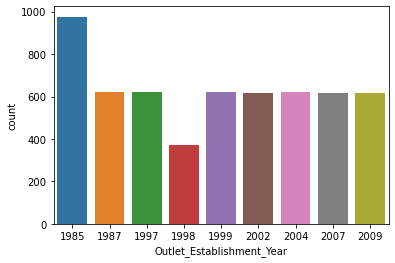

In [28]:
ax = sns.countplot(x="Outlet_Establishment_Year",data=df_visualization_nominal)
print(df_visualization_nominal["Outlet_Establishment_Year"].value_counts())

1    1862
3    1606
2    1592
0     621
Name: Outlet_Size, dtype: int64


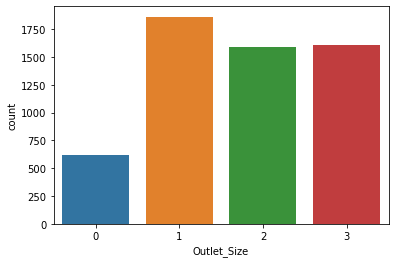

In [29]:
ax = sns.countplot(x="Outlet_Size",data=df_visualization_nominal)
print(df_visualization_nominal["Outlet_Size"].value_counts())

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64


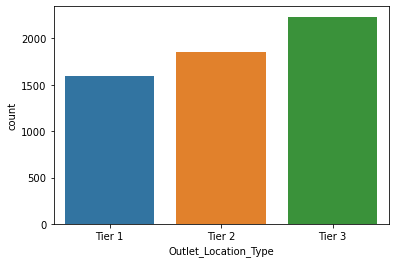

In [30]:
ax = sns.countplot(x="Outlet_Location_Type",data=df_visualization_nominal)
print(df_visualization_nominal["Outlet_Location_Type"].value_counts())

## Making dataframe of the ordinal data

In [31]:
df_visualization_ordinal=df[["Item_Identifier","Item_MRP"]].copy()

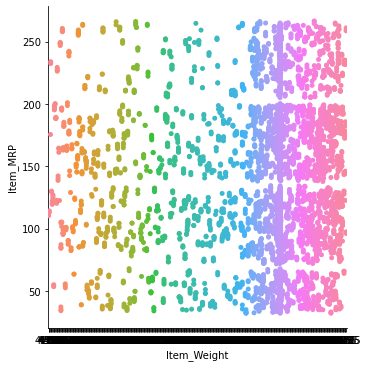

In [32]:
sns.catplot(x="Item_Weight",y="Item_MRP",data=df)

## Checking the distribution of the continuous value of the object type columns

In [33]:
df_visualization_continuous=df[["Outlet_Location_Type","Outlet_Type"]].copy()

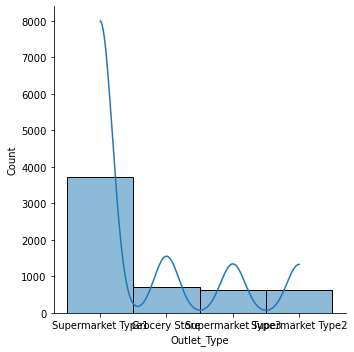

In [34]:
sns.displot(df_visualization_continuous['Outlet_Type'],kde=True)


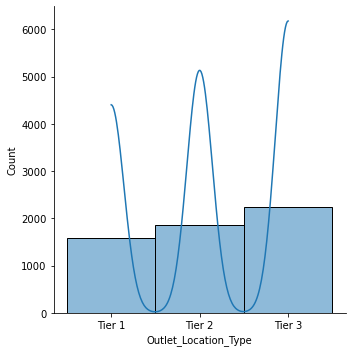

In [35]:
sns.displot(df_visualization_continuous['Outlet_Location_Type'],kde=True)

In [36]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,1,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,3,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,3,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,3,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,1,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,2,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,1,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,3,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,3,Tier 2,Supermarket Type1


## Importing the train dataset

In [93]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [94]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [95]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Correlation of the Columns with the Target Columns

In [96]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

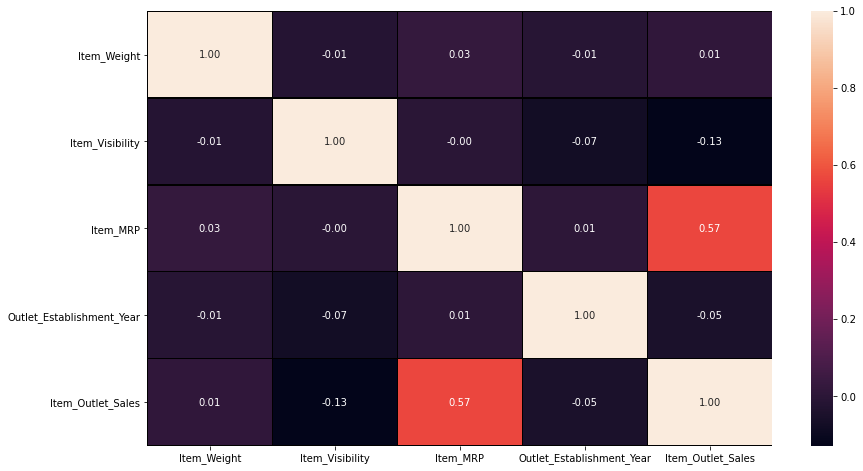

In [97]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt="0.2f")

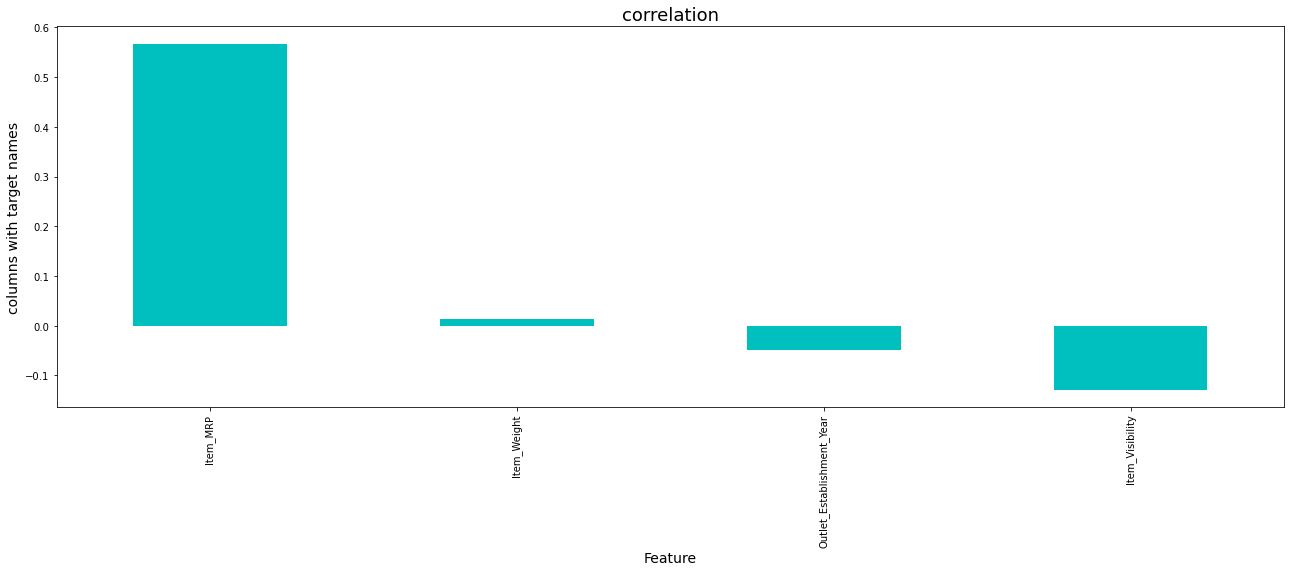

In [98]:
plt.figure(figsize=(22,7))
df.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [99]:
df.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [100]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

<AxesSubplot:>

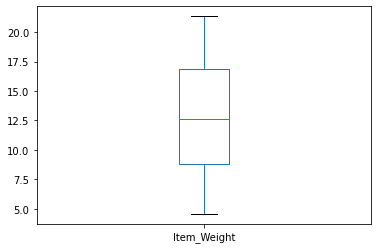

In [101]:
df['Item_Weight'].plot.box()

<AxesSubplot:>

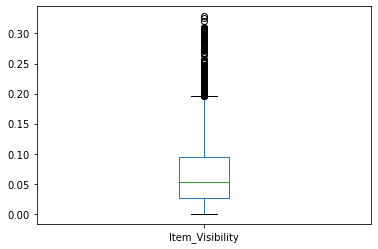

In [102]:
df['Item_Visibility'].plot.box()

<AxesSubplot:>

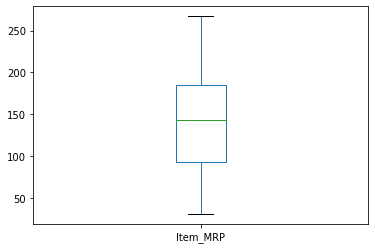

In [103]:
df['Item_MRP'].plot.box()

<AxesSubplot:>

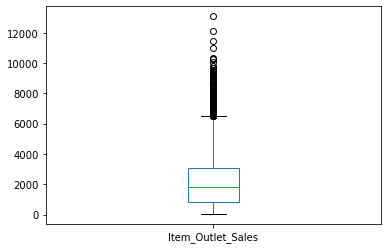

In [104]:

df['Item_Outlet_Sales'].plot.box()

In [105]:
df.shape

(8523, 12)

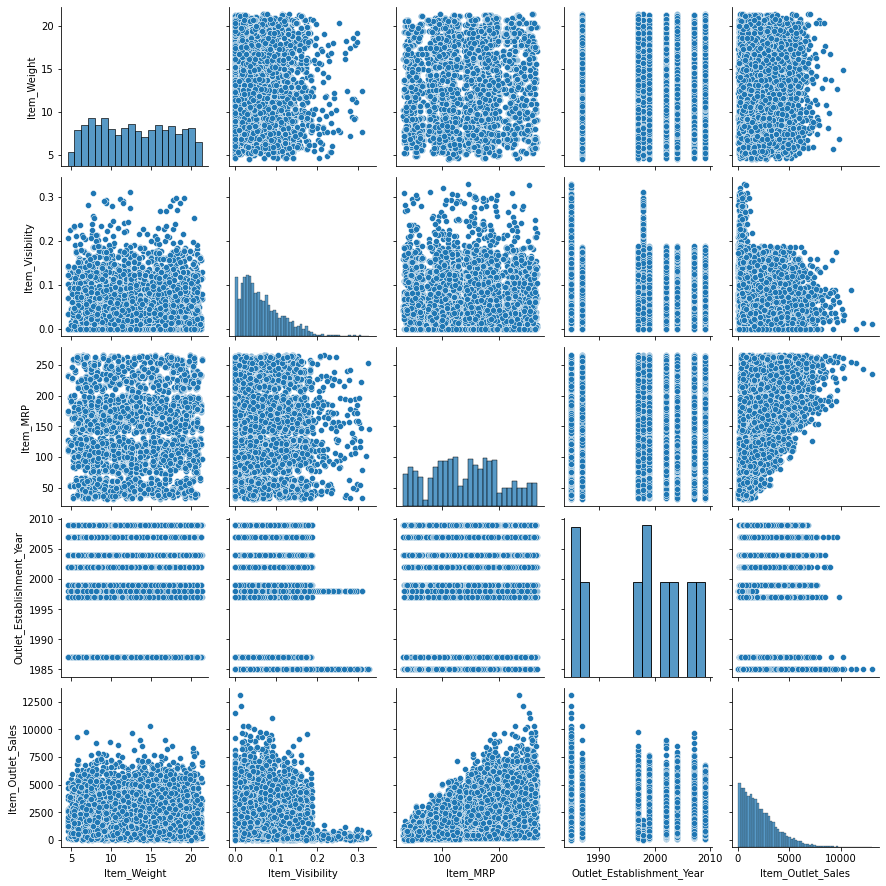

In [106]:
sns.pairplot(df)

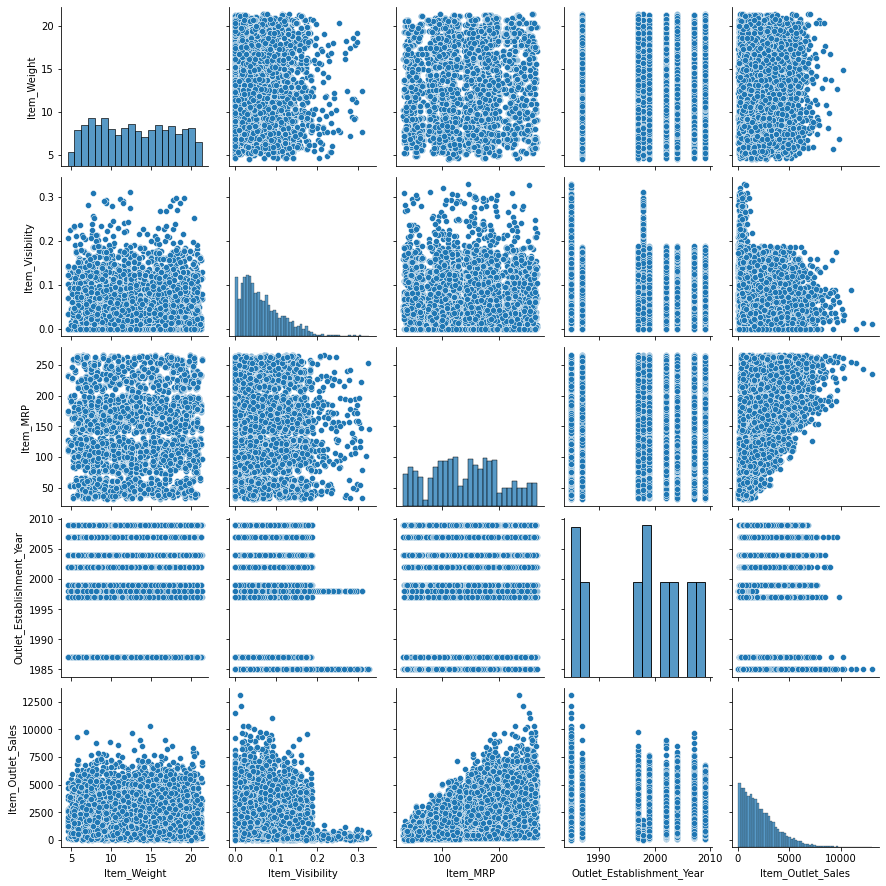

In [107]:
sns.pairplot(df)

In [108]:
df.drop('Item_Weight',axis=1,inplace=True)
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [109]:
df.shape

(8523, 11)

In [110]:
df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [111]:
df.columns=df.columns.str.strip()

In [112]:
df.drop('Item_Identifier',axis=1,inplace=True)
#df.iloc[:0].drop(axis=1)

In [113]:
df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [114]:
df.isnull().sum()

Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [115]:
df.apply(lambda x: len(x.unique()))

Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [116]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [117]:
df=pd.get_dummies(df)
dummy_df=df.copy()

<AxesSubplot:>

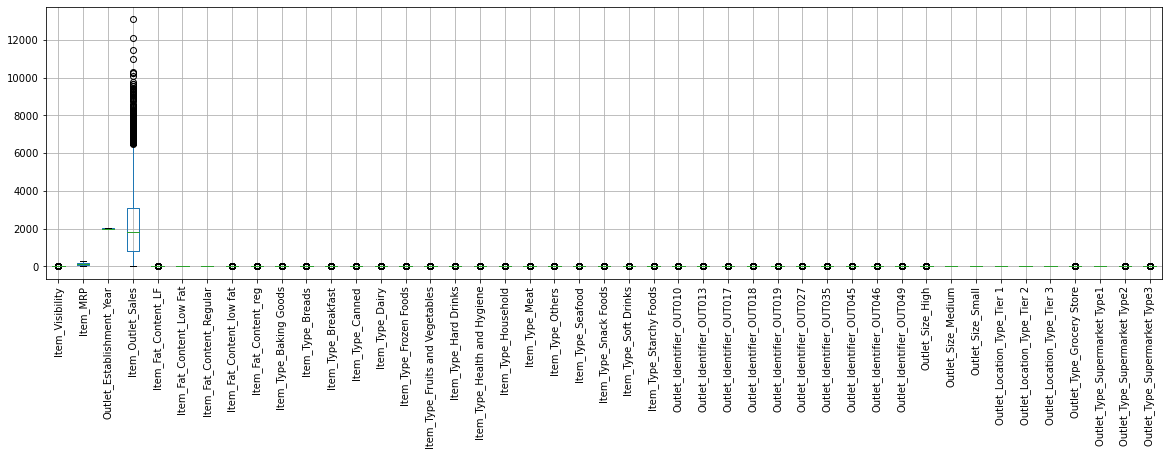

In [118]:
df.boxplot(rot=90,figsize=(20,5))

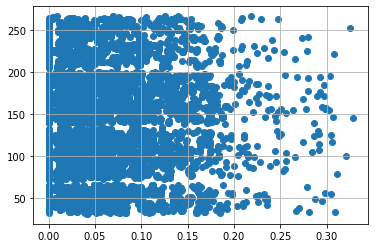

In [119]:
var='Item_Visibility'
plt.scatter(x=df[var],y=df['Item_MRP'])
plt.grid(True)

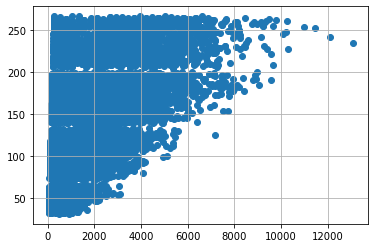

In [120]:
var='Item_Outlet_Sales'
plt.scatter(x=df[var],y=df['Item_MRP'])
plt.grid(True)

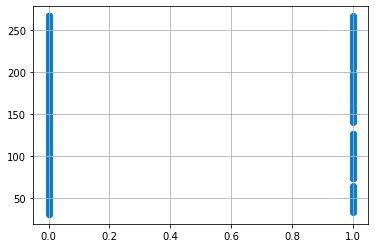

In [121]:

var='Item_Type_Dairy'
plt.scatter(x=df[var],y=df['Item_MRP'])
plt.grid(True)

## Model Training

In [122]:
x_train=df.drop(['Item_MRP'],axis=1)
y_train=df.Item_MRP

In [123]:

x_train.head()

,Item_Visibility,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.016047,1999,3735.1380,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0.019278,2009,443.4228,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0.016760,1999,2097.2700,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0.000000,1998,732.3800,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0.000000,1987,994.7052,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [124]:
y_train.head()

0    249.8092
1     48.2692
2    141.6180
3    182.0950
4     53.8614
Name: Item_MRP, dtype: float64

Here y_train contains item_mrp

In [125]:
x_train.shape

(8523, 44)

In [126]:
y_train.shape

(8523,)

### Regression method

In [127]:

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [128]:
x=df.drop(['Item_MRP'],axis=1)
y=df["Item_MRP"]
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=0, test_size=0.2)


In [129]:
from sklearn.metrics import mean_squared_error
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    print(rmse)

61.566776441564556
62.707629924008444
62.431423482742765
60.248826882384584
60.19499967624523
61.81028219120863
62.87975369991163
60.80569658880523
61.52370195971803
60.78677763362056
62.0369475728874
61.693380735803515
59.39763108898266
60.3620462924707
61.11765599454373
59.8709475271741
62.1318887664002
62.86159547309193
61.083429436872294
61.61579813595807
62.80687025540181
61.04979860271503
63.31863031382861
61.74681971937657
61.49900079297657
61.601731343891096
61.321199835579186
61.75314574809515
61.79084138549103
60.56957335827569
62.49148091251516
61.77576358014494
62.18527727304502
61.97623451756852
59.434270798358284
59.32840340364958
63.0066957385108
62.481010455221934
60.77825124729302
61.95108337206977
60.392034464821826
61.77084740527055
61.077682032775805
62.00910027072649
61.23838417819906
62.659997599099434
62.2054247407487
61.70693835544671
62.908797763282685
61.854256401675684
59.74998691687172
59.25305695058436
61.33171788830609
62.53450345599112
61.184377026576996


In [131]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(x_train,y_train)
y_pred_regressor=regressor.predict(x_test)

In [132]:
y_pred=regressor.predict(x_test)

In [133]:
y_pred

array([215.685 , 122.5388, 194.5794, ..., 114.7176, 140.2496,  64.7168])

In [134]:
dt_accuracy=round(regressor.score(x_train,y_train)*100,2)
dt_accuracy

100.0

In [135]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [136]:
y_pred=regressor.predict(x_test)
y_pred

array([112.59920555,  88.5403579 , 187.78435076, ..., 128.74570816,
       119.22538991, 115.51971456])

In [137]:
lr_accuracy=round(regressor.score(x_train,y_train)*100,2)
lr_accuracy

43.13

In [138]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [139]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [140]:

rf_accuracy=round(regressor.score(x_train,y_train)*100,2)
rf_accuracy

92.53

## Cross validation

In [141]:
from sklearn.model_selection import cross_val_score

In [142]:
print(cross_val_score(regressor,x,y,cv=5).mean())

0.476785327296127


In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:

parameter={"max_depth":[1,3,5,7,9,11,12],
          "criterion":['mse','friedman_mse']}

In [145]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [146]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [147]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 5}

In [148]:
!pip install xgboost

In [155]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [161]:
XGB=XGBRegressor(learning_rate=1,gamma=100,max_depth=5,reg_alpha=0, reg_lambda=0)
XGB

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=100,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=1, max_delta_step=None, max_depth=5,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=0, reg_lambda=0,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [157]:
XGB.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=100, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=5, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=0,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [158]:
XGB.score(x_train, y_train)

0.9096229364463205

In [159]:
pred= XGB.predict(x_train)

In [160]:
XGBS= r2_score(y_train,pred)
XGBS

0.9096229364463205

## Saving the model

In [164]:
Final_mod=XGBRegressor()
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

47.76056670320853


In [165]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']